In [300]:
import pandas as pd
import lightkurve as lk
import numpy as np
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
%matplotlib inline

In [301]:
tess_list = pd.read_csv('md_check.csv', index_col = 0)
k2_halo_stars = pd.read_csv('161_merged_by_epic.csv', sep = ",")[["Name", "Vmag", "Sp. Type", "EPIC ID"]]

In [302]:
stars_list = pd.merge(k2_halo_stars,tess_list, on='Name', how='inner')
stars_list = stars_list.drop_duplicates("EPIC ID").reset_index(drop = True)
#dup = stars_list.duplicated(subset=['Name'])
#stars_list.iloc[dup[dup==True].index]

In [303]:
tess_sectors = stars_list.filter(regex="^S\d+")
tess_sectors_sum = tess_sectors.sum(axis=1)
tess_sectors_sel = pd.DataFrame({'cam':tess_sectors_sum.values})

In [304]:
observed_stars = stars_list.loc[tess_sectors_sel.index[tess_sectors_sel['cam'] >=1]][["Name", "Vmag", "Sp. Type", "EPIC ID"]]

In [305]:
observed_stars

,Name,Vmag,Sp. Type,EPIC ID
0,Porrima,2.740,F1V+F0mF2V,200084004
1,Zaniah,3.900,A2IV,200084005
2,21 Vir,5.480,B9V,200084006
3,FW Vir,5.710,M3+IIICa0.5,200084007
4,HR 4837,5.918,G8III,200084008
...,...,...,...,...
146,gam Tau,3.474,NaN,200007765
147,del1 Tau,3.585,G9.5IIICN0.5,200007766
148,Spica,0.970,B1V,212573842
149,69 Vir,4.750,K0III-IIIbCN1.5CH0.5,212356048


In [306]:
for index, row in observed_stars.iterrows():
    print(row["Name"], row["EPIC ID"])
    

Porrima 200084004
Zaniah 200084005
21 Vir 200084006
FW Vir 200084007
HR 4837 200084008
HR 4591 200084009
HR 4613 200084010
HD 107794 200084011
45 Oph 200128908
HR 6366 200128913
Aldebaran 200173843
tet2 Tau 200173845
tet1 Tau 200173846
del3 Tau 200173849
ups Tau 200173848
rho Tau 200173851
11 Ori 200173853
HR 1427 200173855
15 Ori 200173854
75 Tau 200173852
97 Tau 200173857
HR 1684 200173856
56 Tau 200173861
81 Tau 200173860
53 Tau 200173864
HR 1585 200173858
80 Tau 200173866
51 Tau 200173865
HR 1403 200173867
89 Tau 200173868
HR 1576 200173871
98 Tau 200173870
99 Tau 200173862
105 Tau 200173869
HR 1554 200173874
HR 1385 200173875
HR 1741 200173873
HR 1633 200173872
HR 1755 200173876
kap Psc 200164167
83 Aqr 200164168
24 Psc 200164169
HR 8759 200164170
14 Psc 200164171
HR 8921 200164172
81 Aqr 200164173
HR 8897 200164174
eps Psc 200068392
Revati 200068393
80 Psc 200068394
42 Cet 200068399
33 Cet 200068395
60 Psc 200068396
73 Psc 200068397
WW Psc 200068398
HR 243 200068400
HR 161 200068

In [307]:
name = "Ascella"
epic_id = "200062593"

Download TESS:

In [308]:
lc = lk.search_lightcurve(name,exptime=120).download_all()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

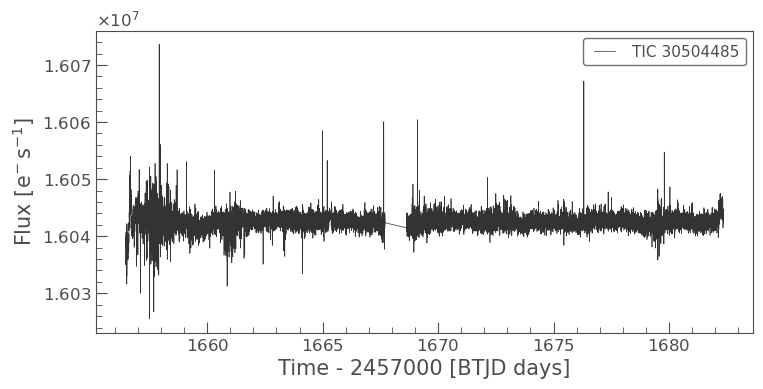

In [309]:
lc[0].plot()

In [310]:
lc[0] = lc[0].remove_nans().normalize()-1

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

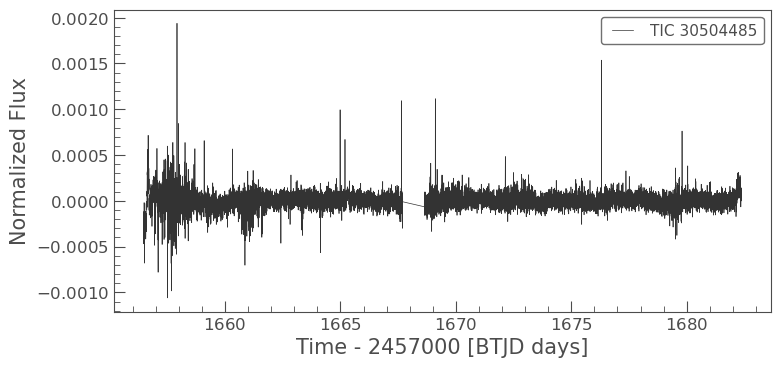

In [311]:
lc[0].plot()

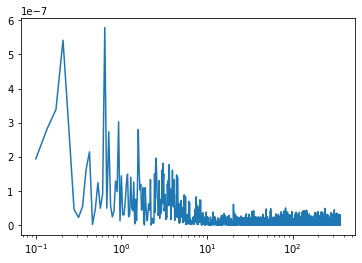

In [314]:
t = lc[0].time.value
y = lc[0].flux.value

freqs_tess = np.linspace((1/10.),360.,10000) # tess from 10 day period to 360 c/d nyquist
ls_tess = LombScargle(t, y, normalization='psd')
power_tess = ls_tess.power(freqs_tess)

plt.plot(freqs_tess, power) 
plt.xscale('log')

Download K2:

In [272]:
import numpy as np
from astropy.table import Table
from scipy.signal import savgol_filter as savgol

In [273]:
fname = 'hlsp_halo_k2_llc_200062593-c7_kepler_v1_lc.fits'
halo = Table.read(fname)

In [274]:
print(halo.keys())

['time', 'flux', 'flux_err', 'centroid_col', 'centroid_row', 'quality', 'cadenceno', 'pos_corr1', 'pos_corr2', 'tr_position', 'tr_time', 'corr_flux']


In [275]:
m = np.isfinite(halo['corr_flux'])
halo = halo[m]
flux = halo['flux']
time = halo['time']
corr_flux = halo['corr_flux']
tr_posi = halo['tr_position']
tr_time = halo['tr_time']
pos_corr1 = halo['pos_corr1']
pos_corr2 = halo['pos_corr2']

In [276]:
normalized_flux = corr_flux/np.nanmedian(corr_flux)

/Users/kote_electric/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [277]:
trend = savgol(corr_flux/np.nanmedian(corr_flux),701,3)

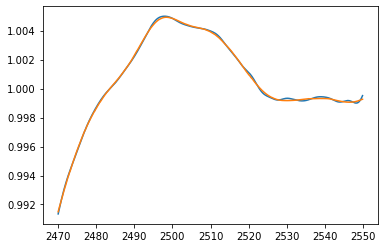

In [278]:
plt.plot(time,tr_time/np.nanmedian(tr_time))
plt.plot(time,trend)

/Users/kote_electric/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


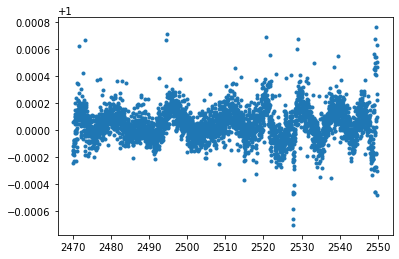

In [279]:
plt.plot(time,corr_flux/np.nanmedian(corr_flux)-trend+np.nanmedian(trend),'.')

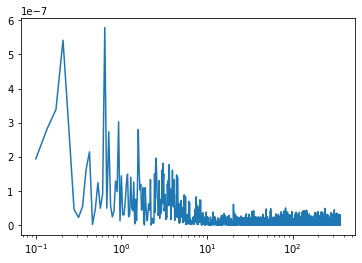

In [316]:
lc_halo = LombScargle(time,corr_flux/np.nanmedian(corr_flux)-trend+np.nanmedian(trend),normalization='psd')
freqs_halo = np.linspace((1/30.),24.,10000)
power_halo = ls_halo.power(freqs_halo)

plt.plot(freqs_tess, power) 
plt.xscale('log')

In [281]:
julian_seconds = 24*60*60
tess_freq_conv = 1#julian_seconds/120
halo_freq_conv = 1#julian_seconds/1800

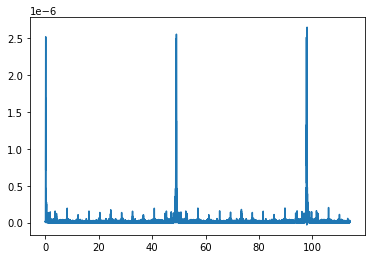

In [282]:
plt.plot(frequency_halo/halo_freq_conv, power_halo) 
#plt.plot(frequency_tess/tess_freq_conv, power_tess) 

In [283]:
50/(1800)

0.027777777777777776

In [284]:
lc[0].time.value

array([1656.46926544, 1656.47065436, 1656.47204327, ..., 1682.35959839,
       1682.36098726, 1682.36237612])

In [285]:
halo

time,flux,flux_err,centroid_col,centroid_row,quality,cadenceno,pos_corr1,pos_corr2,tr_position,tr_time,corr_flux
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2470.018722227469,9312.2216796875,246.3986358642578,45.94394236048928,869.9450392599279,0.0,115549.0,0.1290367990732193,0.00980779156088829,9393.823909410517,9313.633762995554,9313.626774183233
2470.039154428152,9313.494140625,246.08102416992188,45.910081683140774,869.9613481773538,0.0,115550.0,0.07399585098028183,0.016656843945384026,9395.438982296928,9313.862881733392,9313.284162234322
2470.05958652791,9313.8681640625,245.84242248535156,45.87781918916477,869.9787097077146,0.0,115551.0,0.01595626212656498,-0.04143064096570015,9395.31532052861,9314.091831475902,9313.78184744014
2470.080018827197,9313.158203125,245.6846923828125,45.84427900341194,869.9968750020537,0.0,115552.0,-0.027923157438635826,0.01882144995033741,9395.317388353526,9314.320600273895,9313.069818677724
2470.1004510260245,9313.9453125,245.60987854003906,45.813254906222284,870.0134283292235,0.0,115553.0,-0.056545380502939224,-0.07602450251579285,9395.075136793248,9314.549169561298,9314.099179613002
2470.1208831243857,9316.13671875,245.5418701171875,45.78191193534617,870.0160802756486,8192.0,115554.0,-0.16369590163230896,-0.05660552531480789,9395.071183279662,9314.777524248346,9316.294539376588
2470.161747619706,9315.1611328125,245.91015625,46.218205946818266,869.9140544459651,0.0,115556.0,0.03200583904981613,0.24976664781570435,9396.055626590582,9315.233536744958,9314.334510128168
2470.182179816671,9314.6083984375,246.2181396484375,46.14580837583365,869.9520867887446,0.0,115557.0,0.24060183763504028,0.16342435777187347,9395.21181812272,9315.461162739997,9314.62558422103
2470.202612013163,9315.03515625,246.6665802001953,46.07538012478302,869.9780645597406,0.0,115558.0,0.22777003049850464,0.12086255103349686,9395.372490572214,9315.68851609946,9314.891669584036


/Users/kote_electric/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


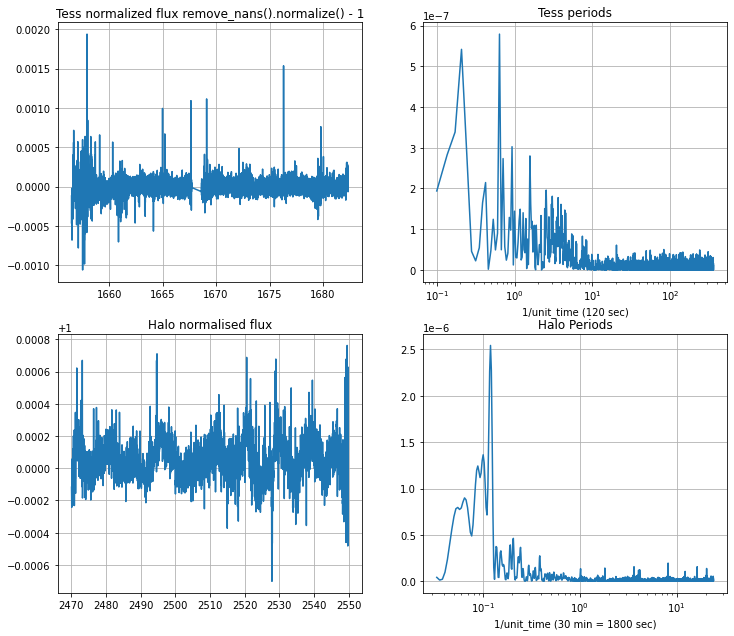

In [317]:
fig = plt.figure(figsize=(12.0,10.5))

plt.subplot(221)
plt.plot(t, y)
plt.yscale('linear')
plt.title('Tess normalized flux remove_nans().normalize() - 1')
plt.grid(True)

plt.subplot(222)
plt.plot(freqs_tess, power_tess)
plt.xscale('log')
plt.xlabel('1/unit_time (120 sec)')
plt.title('Tess periods')
plt.grid(True)

plt.subplot(223)
plt.plot(time,corr_flux/np.nanmedian(corr_flux)-trend+np.nanmedian(trend))
plt.yscale('linear')
plt.title('Halo normalised flux')
plt.grid(True)

plt.subplot(224)
plt.plot(freqs_halo, power_halo)
plt.xscale('log')
plt.xlabel('1/unit_time (30 min = 1800 sec)')
plt.title('Halo Periods')
plt.grid(True)

In [293]:
(1656.47065436-1656.46926544) * (24*60*60)

120.00268799602054

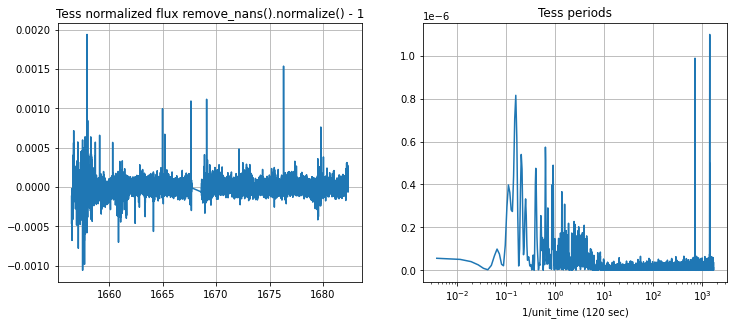

In [294]:
fig = plt.figure(figsize=(12.0,10.5))

plt.subplot(221)
plt.plot(t, y)
plt.yscale('linear')
plt.title('Tess normalized flux remove_nans().normalize() - 1')
plt.grid(True)

plt.subplot(222)
plt.plot(frequency_tess, power_tess)
plt.xscale('log')
plt.xlabel('1/unit_time (120 sec)')
plt.title('Tess periods')
plt.grid(True)



In [297]:
lc[0].time.value

array([1653.9261576 , 1653.92754652, 1653.92893544, ..., 1682.35959839,
       1682.36098726, 1682.36237612])

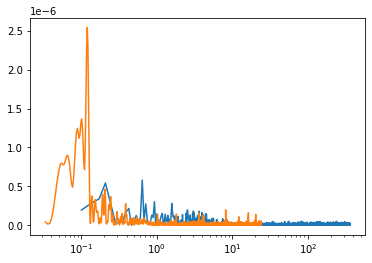

In [322]:
plt.plot(freqs_tess, power_tess)
plt.plot(freqs_halo, power_halo)
plt.xscale('log')

/Users/kote_electric/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


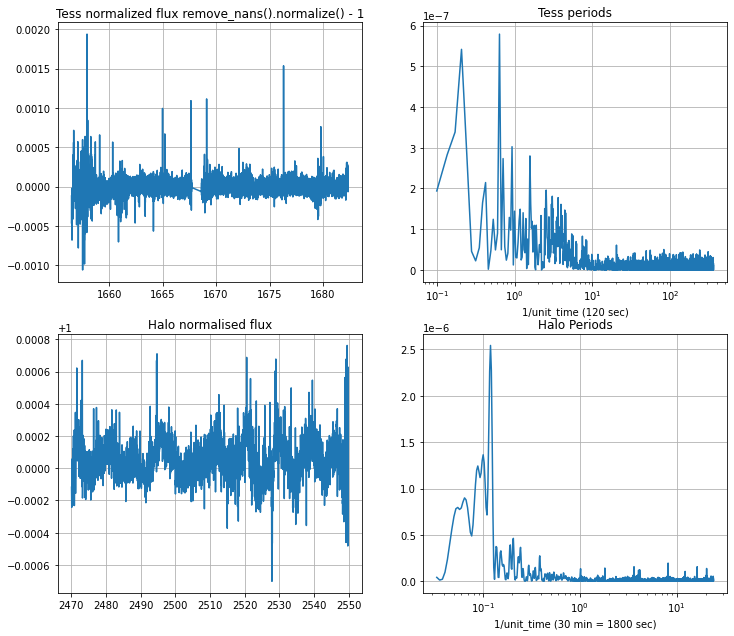

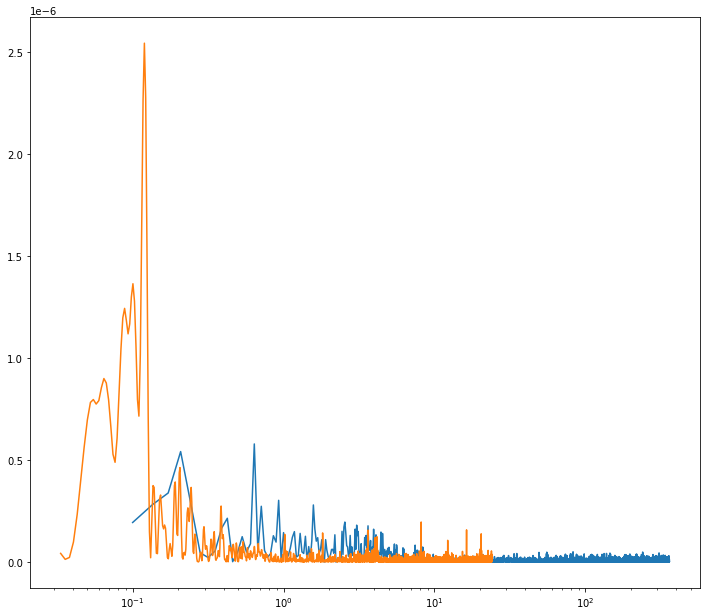

In [327]:
fig = plt.figure(figsize=(12.0,10.5))

plt.subplot(221)
plt.plot(t, y)
plt.yscale('linear')
plt.title('Tess normalized flux remove_nans().normalize() - 1')
plt.grid(True)

plt.subplot(222)
plt.plot(freqs_tess, power_tess)
plt.xscale('log')
plt.xlabel('1/unit_time (120 sec)')
plt.title('Tess periods')
plt.grid(True)

plt.subplot(223)
plt.plot(time,corr_flux/np.nanmedian(corr_flux)-trend+np.nanmedian(trend))
plt.yscale('linear')
plt.title('Halo normalised flux')
plt.grid(True)

plt.subplot(224)
plt.plot(freqs_halo, power_halo)
plt.xscale('log')
plt.xlabel('1/unit_time (30 min = 1800 sec)')
plt.title('Halo Periods')
plt.grid(True)

fig1 = plt.figure(figsize=(12.0,10.5))
plt.plot(freqs_tess, power_tess)
plt.plot(freqs_halo, power_halo)
plt.xscale('log')
plt.title('Tess vs K2')